# Attribute analysis of the dataset

#### Settings

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
degree_color_palette = ["#FF5733FF", "#FFC300FF", "#4CAF50FF"]
satisfaction_color_palette = ["#E84A5FFF", "#FECEA8FF", "#019875FF"]
boolean_color_palette = ["#99B898FF", "#FF847CFF"]
gender_color_palette = ["#FF5733FF", "#4169E1FF"]

In [3]:
degree_labels = ['Low', 'Medium', 'High']

In [4]:
sns.set_theme(style="whitegrid")

In [5]:
df = pd.read_csv("edu_dataset.csv")
df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


## Performance depending on the attributes

### Demographic features

Among demographic features of the dataset there are:
  * Gender
  * Nationality
  * Place of birth

#### Performance depending on gender

Female students seem to have much more high achievers percent-wise than their male counterpart. Moreover, within girls there are less students with low performance.

In [6]:
women_df = df[(df["gender"] == "F")]
men_df = df[(df["gender"] == "M")]

women_H = women_df[(women_df["Class"] == "H")]
women_M = women_df[(women_df["Class"] == "M")]
women_L = women_df[(women_df["Class"] == "L")]

men_H = men_df[(men_df["Class"] == "H")]
men_M = men_df[(men_df["Class"] == "M")]
men_L = men_df[(men_df["Class"] == "L")]

men_class = len(men_L) / len(men_df), len(men_M) / len(men_df), len(men_H) / len(men_df)
women_class =  len(women_L) / len(women_df), len(women_M) / len(women_df), len(women_H) / len(women_df)

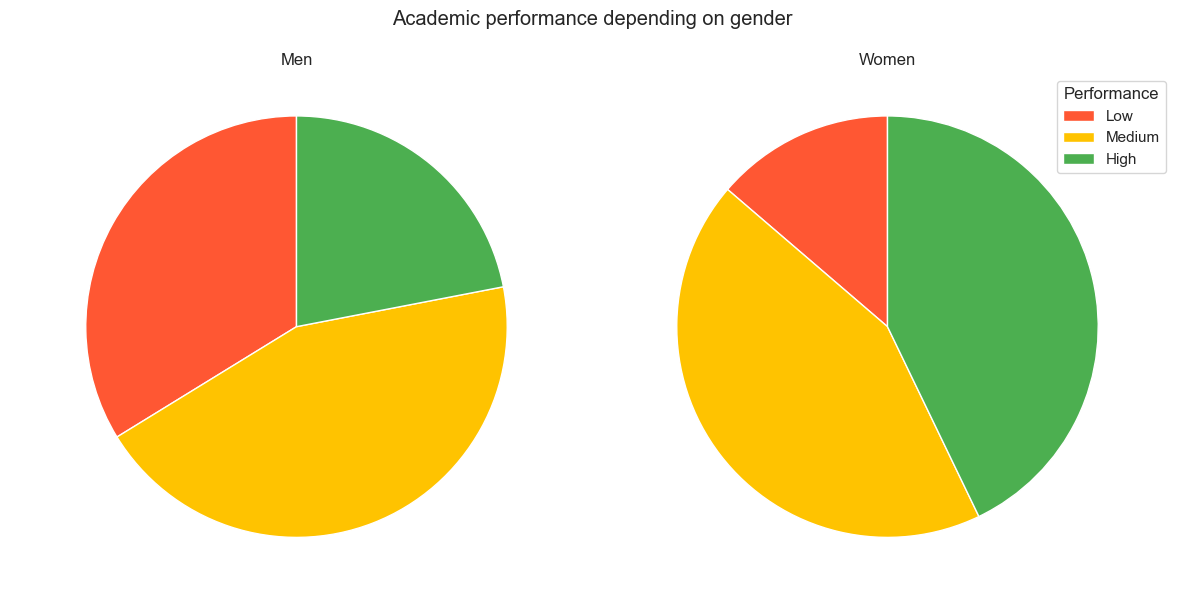

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].pie(men_class, labels=None, startangle=90, colors=degree_color_palette)
axs[0].set_title('Men')

axs[1].pie(women_class, labels=None, startangle=90, colors=degree_color_palette)
axs[1].set_title('Women')

for ax in axs:
    ax.axis('equal')

axs[1].legend(degree_labels, loc="best", title='Performance')

fig.suptitle("Academic performance depending on gender")

plt.tight_layout()
plt.show()

#### Performance depending on nationality / place of birth

The data shows that nationality and place of birth have significant impact on the distribution of academic performance. Students from Iraq have about 60% of high achievers and in Egypt there are only about 20% of students with high academic performance. Values for the low performing students also differ significantly between countries.

It is worth noticing that distribution of performance, for understandable reasons, are quite the same for nationality attribute and place of birth. Duplicated data might be unnecessary when applying classification algorithms.


In [8]:
nationalities = list(set(df.NationalITy))
places_of_birth = list(set(df.PlaceofBirth))
print(f"Nationalities: {nationalities}")
print(f"Places of birth: {places_of_birth}")

Nationalities: ['Egypt', 'Iraq', 'KW', 'SaudiArabia', 'lebanon', 'Jordan', 'venzuela', 'Iran', 'USA', 'Lybia', 'Tunis', 'Palestine', 'Morocco', 'Syria']
Places of birth: ['Egypt', 'Iraq', 'SaudiArabia', 'lebanon', 'Jordan', 'venzuela', 'Iran', 'USA', 'Lybia', 'KuwaIT', 'Tunis', 'Palestine', 'Morocco', 'Syria']


In [9]:
class_on_nationality_dict = {}
for nationality in nationalities:
    nationality_df = df[(df["NationalITy"] == nationality)]
    L_df = df[(df["NationalITy"] == nationality) & (df["Class"] == "L")]
    M_df = df[(df["NationalITy"] == nationality) & (df["Class"] == "M")]
    H_df = df[(df["NationalITy"] == nationality) & (df["Class"] == "H")]
    
    class_on_nationality_dict[nationality] = {
        "H": len(H_df) / len(nationality_df),
        "M": len(M_df) / len(nationality_df),
        "L": len(L_df) / len(nationality_df),
    }
    
class_on_place_of_birth_dict = {}
for place_of_birth in places_of_birth:
    place_of_birth_df = df[(df["PlaceofBirth"] == place_of_birth)]
    L_df = df[(df["PlaceofBirth"] == place_of_birth) & (df["Class"] == "L")]
    M_df = df[(df["PlaceofBirth"] == place_of_birth) & (df["Class"] == "M")]
    H_df = df[(df["PlaceofBirth"] == place_of_birth) & (df["Class"] == "H")]
    
    class_on_place_of_birth_dict[place_of_birth] = {
        "H": len(H_df) / len(place_of_birth_df),
        "M": len(M_df) / len(place_of_birth_df),
        "L": len(L_df) / len(place_of_birth_df),
    }

In [10]:
output_nationality = pd.DataFrame(class_on_nationality_dict).T
output_place_of_birth = pd.DataFrame(class_on_place_of_birth_dict).T
output_nationality.columns = ['High', 'Medium', 'Low']
output_place_of_birth.columns = ['High', 'Medium', 'Low']
print(f"Nationality:\n{output_nationality}\n\n\nPlace of birth:\n{output_place_of_birth}")

Nationality:
                 High    Medium       Low
Egypt        0.222222  0.444444  0.333333
Iraq         0.636364  0.363636  0.000000
KW           0.201117  0.418994  0.379888
SaudiArabia  0.545455  0.363636  0.090909
lebanon      0.529412  0.352941  0.117647
Jordan       0.308140  0.476744  0.215116
venzuela     1.000000  0.000000  0.000000
Iran         0.000000  0.666667  0.333333
USA          0.500000  0.333333  0.166667
Lybia        0.000000  0.000000  1.000000
Tunis        0.250000  0.416667  0.333333
Palestine    0.428571  0.571429  0.000000
Morocco      0.250000  0.500000  0.250000
Syria        0.285714  0.428571  0.285714


Place of birth:
                 High    Medium       Low
Egypt        0.333333  0.333333  0.333333
Iraq         0.636364  0.363636  0.000000
SaudiArabia  0.437500  0.312500  0.250000
lebanon      0.578947  0.315789  0.105263
Jordan       0.301136  0.505682  0.193182
venzuela     1.000000  0.000000  0.000000
Iran         0.000000  0.666667  0.333333
USA

### Educational features

Among the educational features there are:
* Educational stage (Primary, Middle, High)
* Form pupil is studying at
* Topic of studying
* Letter of students class
* Semester of studying (1st and 2nd)

#### Performance depending on educational stage

Data shows that academic performance depends on the educational stage of a student. There is an increase in the percent of people with high achievements with the duration of time. Low achievements have a "u" form and medium achievements are "n" like.

In [11]:
stage_dictionary = {
    "Primary school": {
        "H": len(df[(df["StageID"] == "lowerlevel") & (df["Class"] == "H")]),
        "M": len(df[(df["StageID"] == "lowerlevel") & (df["Class"] == "M")]),
        "L": len(df[(df["StageID"] == "lowerlevel") & (df["Class"] == "L")]),
    },
    "Middle school": {
        "H": len(df[(df["StageID"] == "MiddleSchool") & (df["Class"] == "H")]),
        "M": len(df[(df["StageID"] == "MiddleSchool") & (df["Class"] == "M")]),
        "L": len(df[(df["StageID"] == "MiddleSchool") & (df["Class"] == "L")]),
    },
    "High school": {
        "H": len(df[(df["StageID"] == "HighSchool") & (df["Class"] == "H")]),
        "M": len(df[(df["StageID"] == "HighSchool") & (df["Class"] == "M")]),
        "L": len(df[(df["StageID"] == "HighSchool") & (df["Class"] == "L")]),
    }
}

for key, value in stage_dictionary.items():
    if key == "Primary school":
        for key_x, value_x in stage_dictionary[key].items():
            stage_dictionary[key][key_x] /= len(df[(df["StageID"] == "lowerlevel")])
    elif key == "Middle school":
        for key_x, value_x in stage_dictionary[key].items():
            stage_dictionary[key][key_x] /= len(df[(df["StageID"] == "MiddleSchool")])
    elif key == "High school":
        for key_x, value_x in stage_dictionary[key].items():
            stage_dictionary[key][key_x] /= len(df[(df["StageID"] == "HighSchool")])
    else:
        print("WARNING: Unknown StageID")

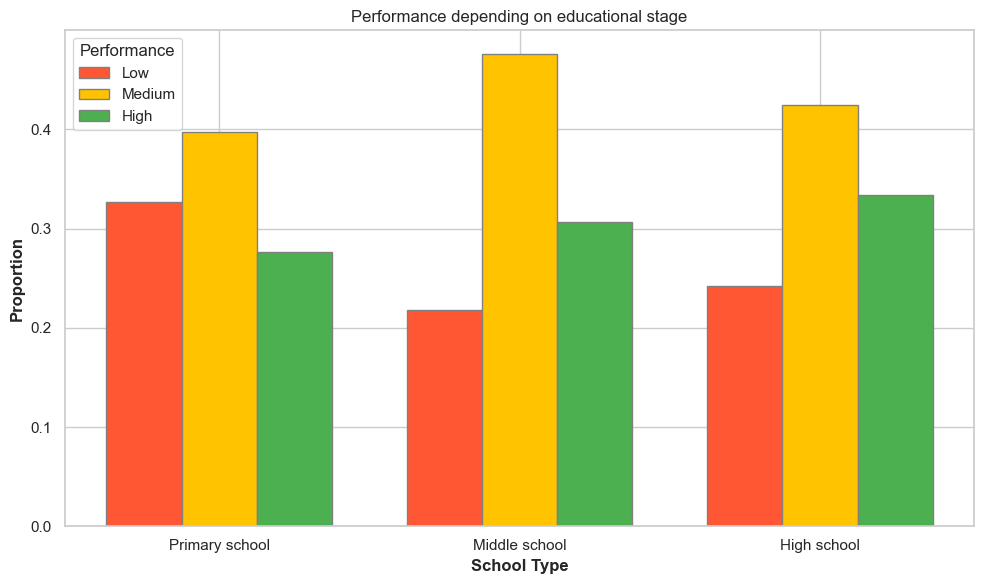

In [12]:
categories = list(stage_dictionary.keys())
H_values = [stage_dictionary[category]['H'] for category in categories]
M_values = [stage_dictionary[category]['M'] for category in categories]
L_values = [stage_dictionary[category]['L'] for category in categories]

bar_width = 0.25
r1 = np.arange(len(categories))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.figure(figsize=(10, 6))
plt.bar(r1, L_values, color=degree_color_palette[0], width=bar_width, edgecolor='grey', label='L')
plt.bar(r2, M_values, color=degree_color_palette[1], width=bar_width, edgecolor='grey', label='M')
plt.bar(r3, H_values, color=degree_color_palette[2], width=bar_width, edgecolor='grey', label='H')

plt.xlabel('School Type', fontweight='bold')
plt.ylabel('Proportion', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(categories))], categories)

plt.title('Performance depending on educational stage')
plt.legend(labels=degree_labels, title='Performance')
plt.tight_layout()
plt.show()

#### Performance by the topic learned

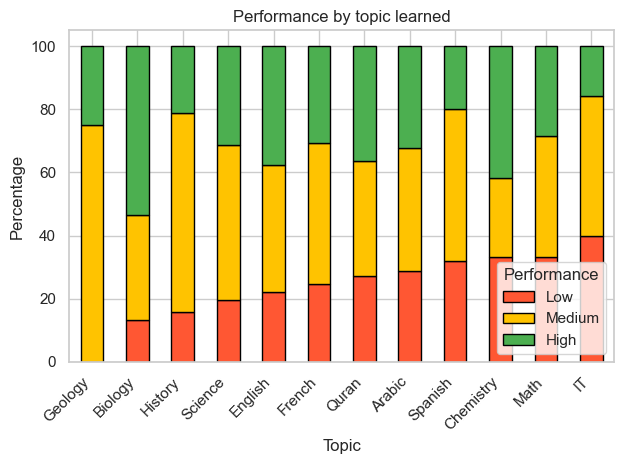

In [13]:
topic_performance = df.groupby(['Topic', 'Class']).size().unstack(fill_value=0)
topic_performance_percent = topic_performance.div(topic_performance.sum(axis=1), axis=0) * 100
topic_performance_percent = topic_performance_percent[['L', 'M', 'H']]
topic_performance_percent = topic_performance_percent.sort_values(by='L')
topic_performance_percent.plot(kind='bar', stacked=True, color=degree_color_palette, edgecolor='black')

plt.xlabel('Topic')
plt.ylabel('Percentage')
plt.title('Performance by topic learned')
plt.xticks(rotation=45, ha='right')
plt.legend(loc="lower right", labels=degree_labels, title='Performance')
plt.tight_layout()

plt.show()

#### Performance depending on letter of the class student is studying at

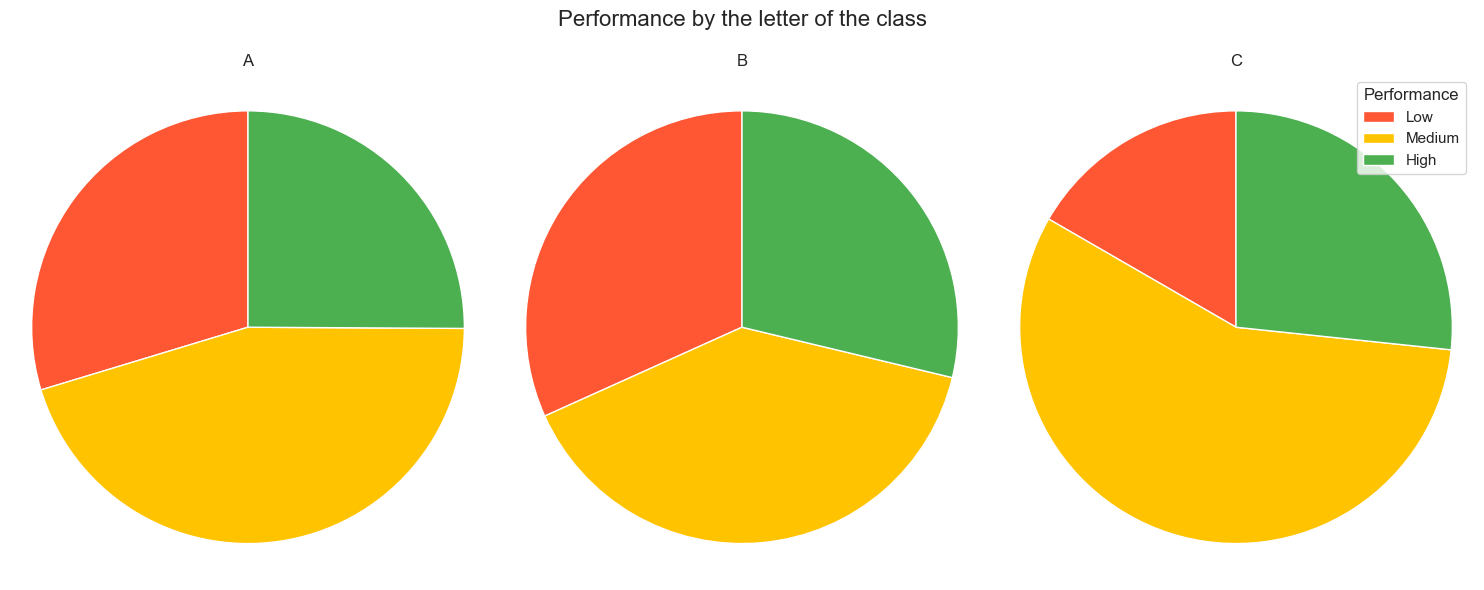

In [14]:
class_a = df[df['SectionID'] == 'A']
class_b = df[df['SectionID'] == 'B']
class_c = df[df['SectionID'] == 'C']

class_a_H = class_a[(class_a["Class"] == "H")]
class_a_M = class_a[(class_a["Class"] == "M")]
class_a_L = class_a[(class_a["Class"] == "L")]

class_b_H = class_b[(class_b["Class"] == "H")]
class_b_M = class_b[(class_b["Class"] == "M")]
class_b_L = class_b[(class_b["Class"] == "L")]

class_c_H = class_c[(class_c["Class"] == "H")]
class_c_M = class_c[(class_c["Class"] == "M")]
class_c_L = class_c[(class_c["Class"] == "L")]

class_a_class = (
    len(class_a_H) / len(class_a),
    len(class_a_M) / len(class_a),
    len(class_a_L) / len(class_a)
)

class_b_class = (
    len(class_b_H) / len(class_b),
    len(class_b_M) / len(class_b),
    len(class_b_L) / len(class_b)
)

class_c_class = (
    len(class_c_H) / len(class_c),
    len(class_c_M) / len(class_c),
    len(class_c_L) / len(class_c)
)

fig, axs = plt.subplots(1, 3, figsize=(15, 6))
axs[0].pie(class_a_class, labels=None, colors=degree_color_palette, startangle=90, textprops={'fontsize': 14})
axs[0].set_title('A')

axs[1].pie(class_b_class, labels=None, colors=degree_color_palette, startangle=90, textprops={'fontsize': 14})
axs[1].set_title('B')

axs[2].pie(class_c_class, labels=None, colors=degree_color_palette, startangle=90, textprops={'fontsize': 14})
axs[2].set_title('C')
axs[2].legend(degree_labels, loc="upper right", title='Performance')

fig.suptitle('Performance by the letter of the class', fontsize=16)

for ax in axs:
    ax.axis('equal')

plt.tight_layout()
plt.show()

#### Performance depending on the number of semester

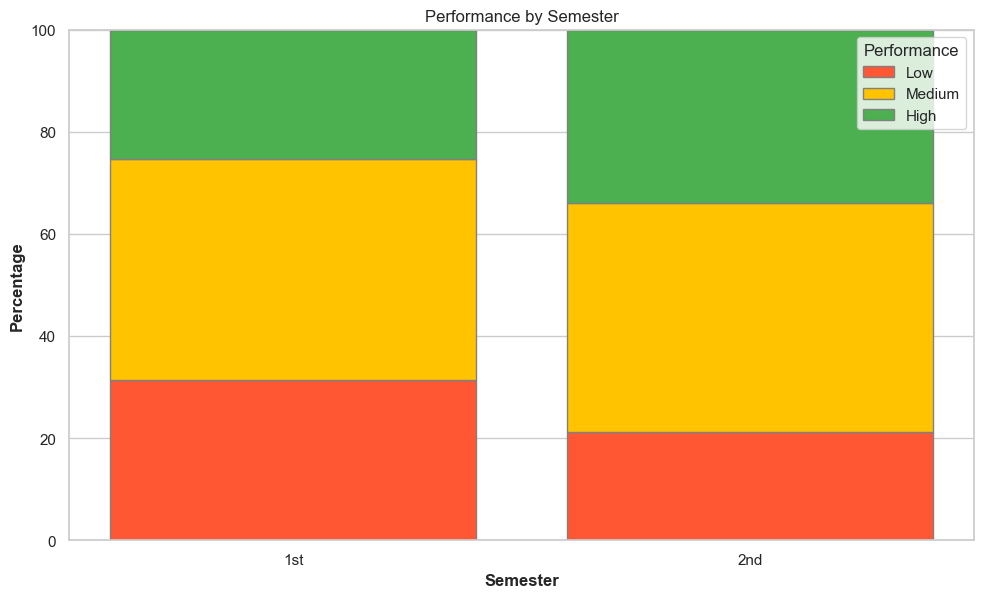

In [15]:
semester_performance_dictionary = {
    "F": {
        "H": len(df[(df["Semester"] == "F") & (df["Class"] == "H")]),
        "M": len(df[(df["Semester"] == "F") & (df["Class"] == "M")]),
        "L": len(df[(df["Semester"] == "F") & (df["Class"] == "L")]),
    },
    "S": {
        "H": len(df[(df["Semester"] == "S") & (df["Class"] == "H")]),
        "M": len(df[(df["Semester"] == "S") & (df["Class"] == "M")]),
        "L": len(df[(df["Semester"] == "S") & (df["Class"] == "L")]),
    }
}

for key in semester_performance_dictionary:
    total = sum(semester_performance_dictionary[key].values())
    for key_x in semester_performance_dictionary[key]:
        semester_performance_dictionary[key][key_x] /= total

categories = list(semester_performance_dictionary.keys())
H_values = [semester_performance_dictionary[category]['H'] for category in categories]
M_values = [semester_performance_dictionary[category]['M'] for category in categories]
L_values = [semester_performance_dictionary[category]['L'] for category in categories]

totals = [H + M + L for H, M, L in zip(H_values, M_values, L_values)]
sorted_data = sorted(zip(categories, H_values, M_values, L_values, totals), key=lambda x: x[4], reverse=True)

categories, H_values, M_values, L_values, _ = zip(*sorted_data)

totals = [H + M + L for H, M, L in zip(H_values, M_values, L_values)]
H_percent = [H * 100 for H in H_values]
M_percent = [M * 100 for M in M_values]
L_percent = [L * 100 for L in L_values]

bar_width = 0.5
r1 = np.arange(len(categories))

plt.figure(figsize=(10, 6))

plt.bar(r1, L_percent, color=degree_color_palette[0], edgecolor='grey', label='Low')
plt.bar(r1, M_percent, bottom=L_percent, color=degree_color_palette[1], edgecolor='grey', label='Medium')
plt.bar(r1, H_percent, bottom=[i + j for i, j in zip(L_percent, M_percent)], color=degree_color_palette[2],
        edgecolor='grey', label='High')

plt.xlabel('Semester', fontweight='bold')
plt.ylabel('Percentage', fontweight='bold')
plt.xticks(r1, ['1st', '2nd'])
plt.ylim(0, 100)

plt.legend(title='Performance')
plt.tight_layout()
plt.title('Performance by Semester')
plt.show()

### Behavioral features

Among behavioral features there are:
* Number of days student is absent
* Whether parents are answering the surveys
* Raised hands
* Visited resources
* Viewed announcements
* Discussions
* Parents school satisfaction
* Parent responsible

### Performance depending on the number of absence days

Number of days student is absent during semester is one of the most influential attributes. If one is absent for more than 7 days throughout the semester then his chances of becoming a high achiever plummet.

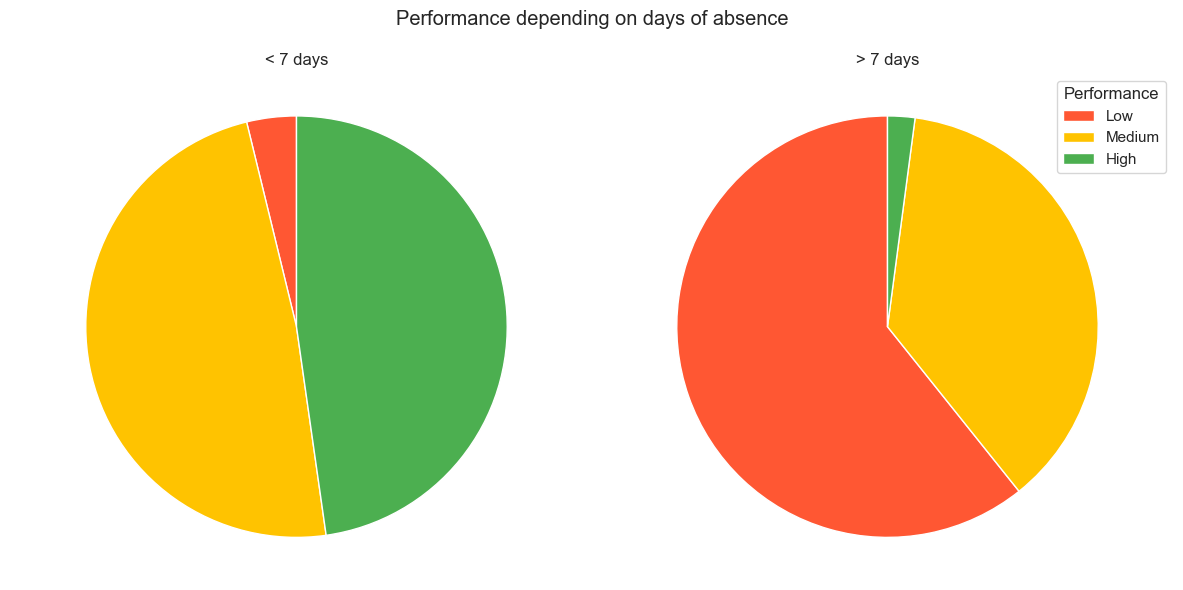

In [16]:
under7 = df[df['StudentAbsenceDays'] == 'Under-7']
above7 = df[df['StudentAbsenceDays'] == 'Above-7']

under7_H = under7[(under7["Class"] == "H")]
under7_M = under7[(under7["Class"] == "M")]
under7_L = under7[(under7["Class"] == "L")]

above7_H = above7[(above7["Class"] == "H")]
above7_M = above7[(above7["Class"] == "M")]
above7_L = above7[(above7["Class"] == "L")]

under7_class = len(under7_L) / len(under7), len(under7_M) / len(under7), len(under7_H) / len(under7)
above7_class = len(above7_L) / len(above7), len(above7_M) / len(above7), len(above7_H) / len(above7)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].pie(under7_class, labels=None, startangle=90, colors=degree_color_palette)
axs[0].set_title('< 7 days')

axs[1].pie(above7_class, labels=None, startangle=90, colors=degree_color_palette)
axs[1].set_title('> 7 days')

fig.suptitle('Performance depending on days of absence')

for ax in axs:
    ax.axis('equal')

axs[1].legend(degree_labels, loc="best", title='Performance')
plt.tight_layout()
plt.show()

### Performance on whether parents of a student are answering on surveys

This attribute is another one hugely influencing the distribution of performance. When parents don't answer the surveys in school students have much smaller chances to have high academic achievements. Consequently, when parents do answer the surveys their children have considerably high chances to become high achievers.

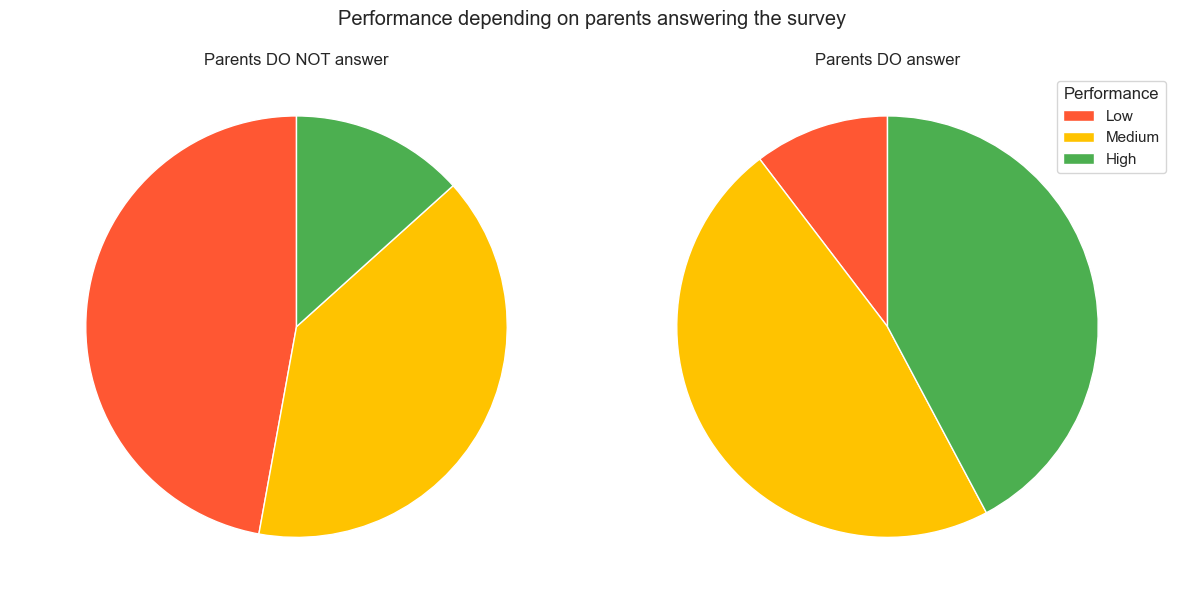

In [17]:
parent_satisfied_no = df[df['ParentAnsweringSurvey'] == 'No']
parent_satisfied_yes = df[df['ParentAnsweringSurvey'] == 'Yes']

parent_satisfied_no_H = parent_satisfied_no[(parent_satisfied_no["Class"] == "H")]
parent_satisfied_no_M = parent_satisfied_no[(parent_satisfied_no["Class"] == "M")]
parent_satisfied_no_L = parent_satisfied_no[(parent_satisfied_no["Class"] == "L")]

parent_satisfied_yes_H = parent_satisfied_yes[(parent_satisfied_yes["Class"] == "H")]
parent_satisfied_yes_M = parent_satisfied_yes[(parent_satisfied_yes["Class"] == "M")]
parent_satisfied_yes_L = parent_satisfied_yes[(parent_satisfied_yes["Class"] == "L")]

parent_satisfied_no_class = (
    len(parent_satisfied_no_L) / len(parent_satisfied_no),
    len(parent_satisfied_no_M) / len(parent_satisfied_no),
    len(parent_satisfied_no_H) / len(parent_satisfied_no)
)

parent_satisfied_yes_class = (
    len(parent_satisfied_yes_L) / len(parent_satisfied_yes),
    len(parent_satisfied_yes_M) / len(parent_satisfied_yes),
    len(parent_satisfied_yes_H) / len(parent_satisfied_yes)
)


fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].pie(parent_satisfied_no_class, labels=None, startangle=90, colors=degree_color_palette)
axs[0].set_title('Parents DO NOT answer')

axs[1].pie(parent_satisfied_yes_class, labels=None, startangle=90, colors=degree_color_palette)
axs[1].set_title('Parents DO answer')

fig.suptitle('Performance depending on parents answering the survey')

for ax in axs:
    ax.axis('equal')

axs[1].legend(degree_labels, loc="best", title='Performance')
plt.tight_layout()
plt.show()

#### General analysis of continuous behavioural attributes

In the presented value the numbers for continuous attributes are normalized to take values from 0 to 100 for easier data interpretation.

In [18]:
real_labels = ['H', 'M', 'L']
attributes = ["raisedhands", "VisITedResources", "AnnouncementsView", "Discussion"]
attribute_titles = ["Raised hands", "Visited resources", "Viewed announcements", "Discussions"]
performance_mapping = {r: e for r, e in zip(real_labels, degree_labels[::-1])}
formatted_df = df.copy()
formatted_df['Formatted_Class'] = df['Class'].map(performance_mapping)

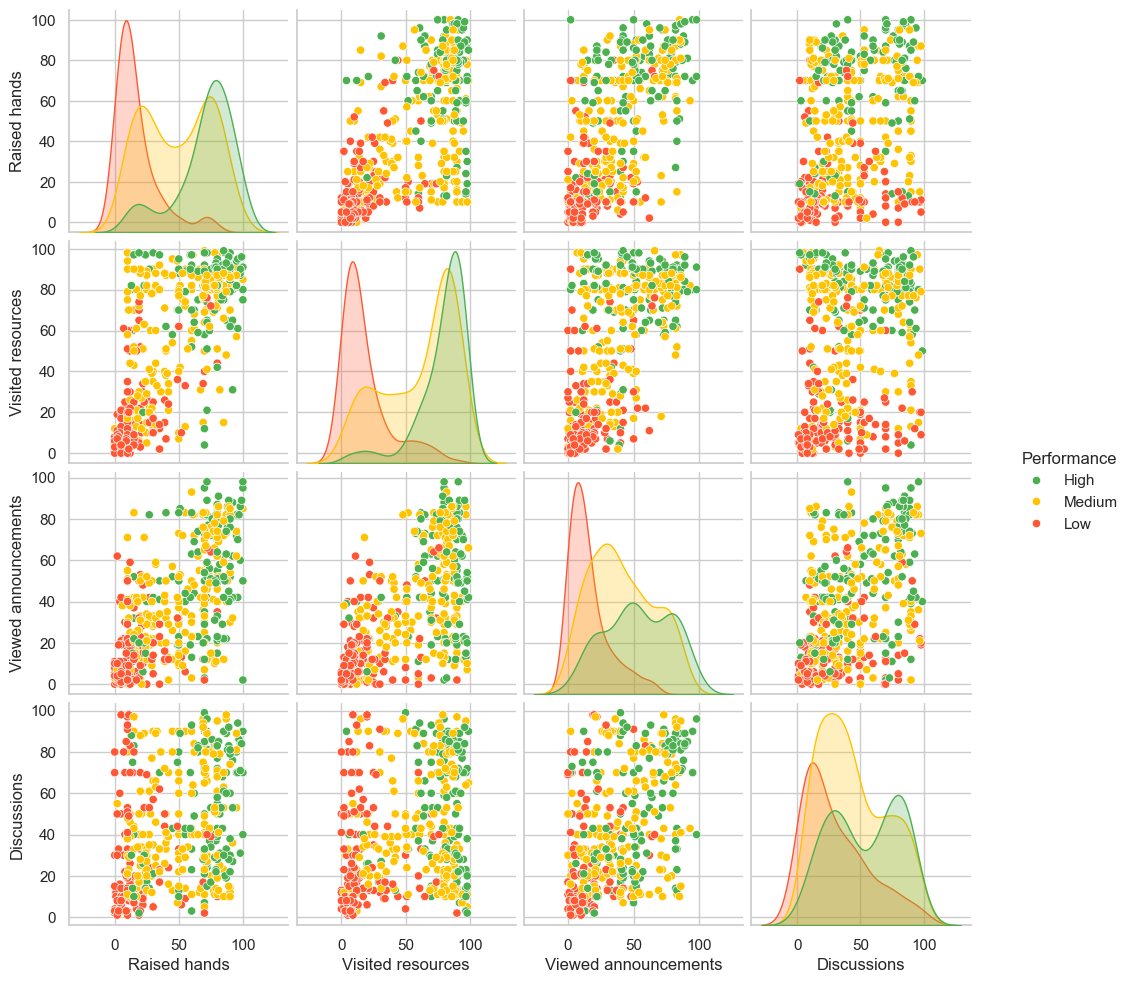

In [19]:
rename_dict = dict(zip(attributes, attribute_titles))
formatted_df.rename(columns=rename_dict, inplace=True)

plot = sns.pairplot(data=formatted_df, hue='Formatted_Class', hue_order=degree_labels[::-1], palette=degree_color_palette[::-1])
plot._legend.set_title(title='Performance')

plt.show()
formatted_df.rename(columns={v: k for k, v in rename_dict.items()}, inplace=True)

#### Performance by participation in discussion groups

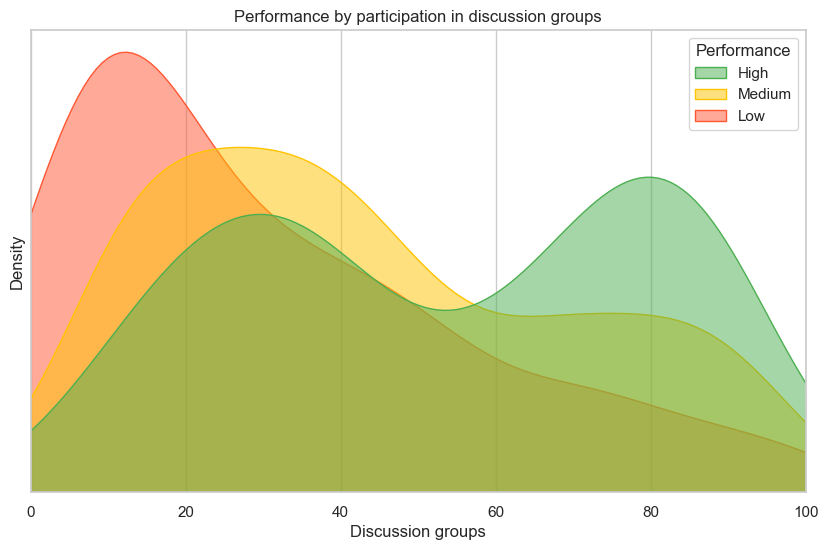

In [20]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=formatted_df, x='Discussion', hue='Formatted_Class', hue_order=degree_labels[::-1], palette=degree_color_palette[::-1], fill=True, common_norm=False, alpha=0.5)
plt.gca().get_legend().set_title('Performance')
plt.title('Performance by participation in discussion groups')
plt.yticks([])
plt.xlim(0, 100)
plt.xlabel('Discussion groups')
plt.ylabel('Density')
plt.show()

#### Performance by the amount of visited resources

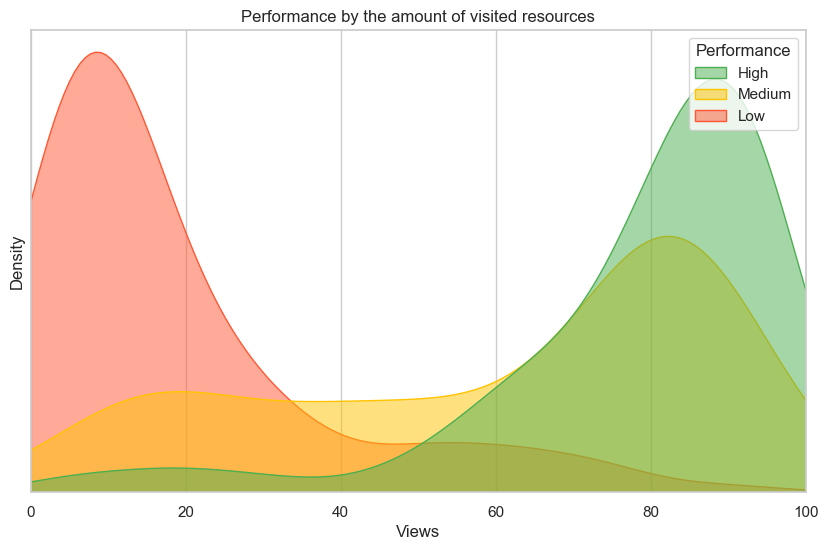

In [21]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=formatted_df, x='VisITedResources', hue='Formatted_Class', fill=True, hue_order=degree_labels[::-1], palette=degree_color_palette[::-1], common_norm=False, alpha=0.5)
plt.gca().get_legend().set_title('Performance')
plt.title('Performance by the amount of visited resources')
plt.yticks([])
plt.xlim(0, 100)
plt.xlabel('Views')
plt.ylabel('Density')
plt.show()

#### Performance by the amount of raised hands

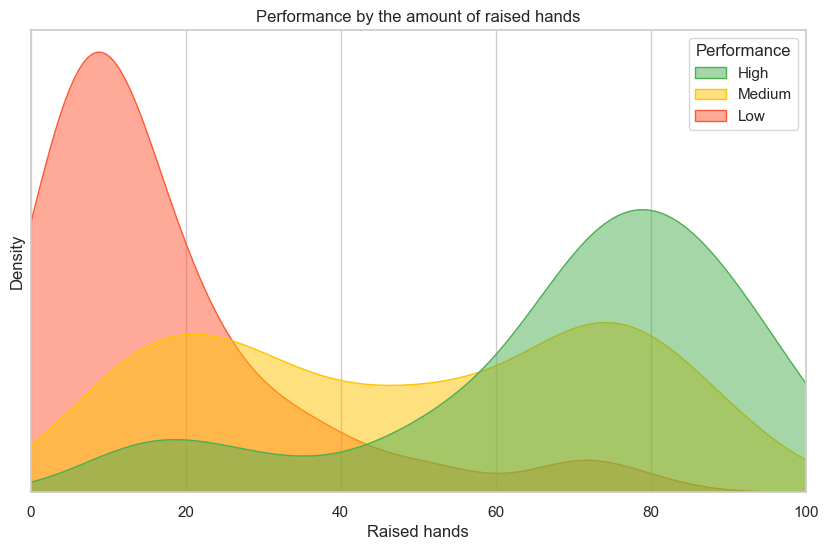

In [22]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=formatted_df, x='raisedhands', hue='Formatted_Class', hue_order=degree_labels[::-1], palette=degree_color_palette[::-1], fill=True, common_norm=False, alpha=0.5)
plt.gca().get_legend().set_title('Performance')
plt.title('Performance by the amount of raised hands')
plt.yticks([])
plt.xlim(0, 100)
plt.xlabel('Raised hands')
plt.ylabel('Density')
plt.show()

#### Performance by the amount of announcement views

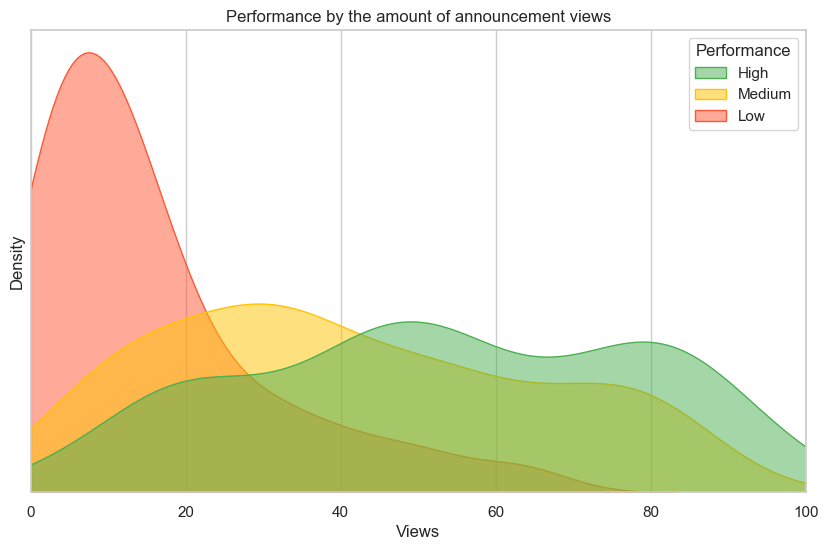

In [23]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=formatted_df, x='AnnouncementsView', hue='Formatted_Class', hue_order=degree_labels[::-1],
            palette=degree_color_palette[::-1], fill=True, common_norm=False, alpha=0.5)
plt.gca().get_legend().set_title('Performance')
plt.title('Performance by the amount of announcement views')
plt.yticks([])
plt.xlim(0, 100)
plt.xlabel('Views')
plt.ylabel('Density')
plt.show()

#### Performance by parents' school satisfaction

In [24]:
parents_satisfaction_dictionary = {
    "Good": {
        "H": len(df[(df["ParentschoolSatisfaction"] == "Good") & (df["Class"] == "H")]),
        "M": len(df[(df["ParentschoolSatisfaction"] == "Good") & (df["Class"] == "M")]),
        "L": len(df[(df["ParentschoolSatisfaction"] == "Good") & (df["Class"] == "L")]),
    },
    "Bad": {
        "H": len(df[(df["ParentschoolSatisfaction"] == "Bad") & (df["Class"] == "H")]),
        "M": len(df[(df["ParentschoolSatisfaction"] == "Bad") & (df["Class"] == "M")]),
        "L": len(df[(df["ParentschoolSatisfaction"] == "Bad") & (df["Class"] == "L")]),
    }
}

for key, value in parents_satisfaction_dictionary.items():
    if key == "Good":
        for key_x, value_x in parents_satisfaction_dictionary[key].items():
            parents_satisfaction_dictionary[key][key_x] /= len(df[(df["ParentschoolSatisfaction"] == "Good")])
    elif key == "Bad":
        for key_x, value_x in parents_satisfaction_dictionary[key].items():
            parents_satisfaction_dictionary[key][key_x] /= len(df[(df["ParentschoolSatisfaction"] == "Bad")])
    else:
        print("WARNING: Unknown parents satisfaction:", key)

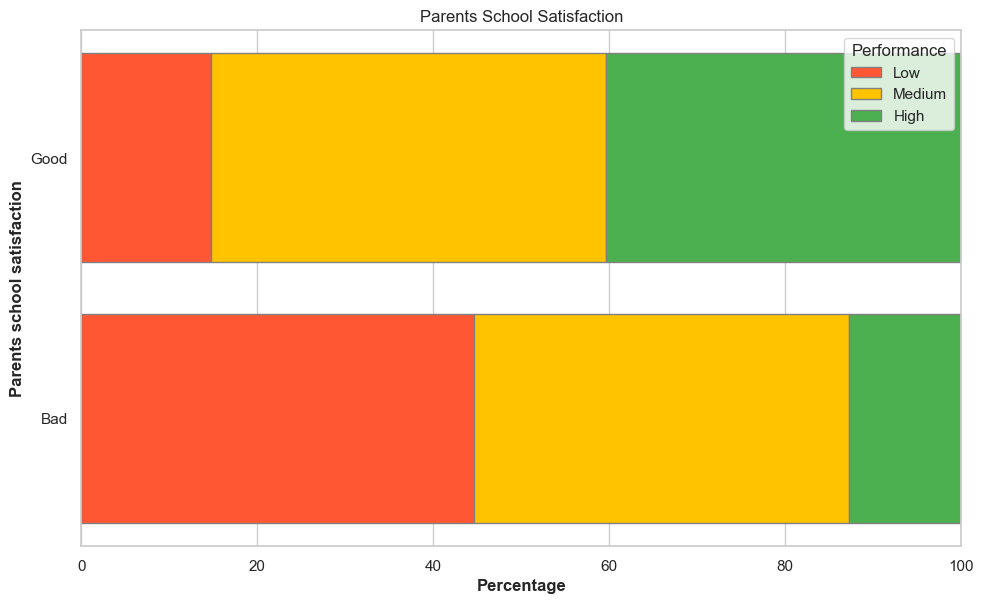

In [25]:
categories = list(parents_satisfaction_dictionary.keys())
H_values = [parents_satisfaction_dictionary[category]['H'] for category in categories]
M_values = [parents_satisfaction_dictionary[category]['M'] for category in categories]
L_values = [parents_satisfaction_dictionary[category]['L'] for category in categories]

totals = [H + M + L for H, M, L in zip(H_values, M_values, L_values)]

sorted_data = sorted(zip(categories, H_values, M_values, L_values, totals), key=lambda x: x[4], reverse=True)
sorted_data.reverse()

categories, H_values, M_values, L_values, _ = zip(*sorted_data)

totals = [H + M + L for H, M, L in zip(H_values, M_values, L_values)]
H_percent = [H / total * 100 for H, total in zip(H_values, totals)]
M_percent = [M / total * 100 for M, total in zip(M_values, totals)]
L_percent = [L / total * 100 for L, total in zip(L_values, totals)]

bar_width = 0.5
r1 = np.arange(len(categories))

plt.figure(figsize=(10, 6))

plt.barh(r1, L_percent, color=degree_color_palette[0], edgecolor='grey', label='Low')
plt.barh(r1, M_percent, left=L_percent, color=degree_color_palette[1], edgecolor='grey', label='Medium')
plt.barh(r1, H_percent, left=[i + j for i, j in zip(L_percent, M_percent)], color=degree_color_palette[2], edgecolor='grey', label='High')

plt.xlabel('Percentage', fontweight='bold')
plt.ylabel('Parents school satisfaction', fontweight='bold')
plt.yticks(r1, categories)
plt.xlim(0, 100)

plt.legend(title='Performance')
plt.tight_layout()
plt.title('Parents School Satisfaction')
plt.show()

#### Performance depending on the parent responsible for the student

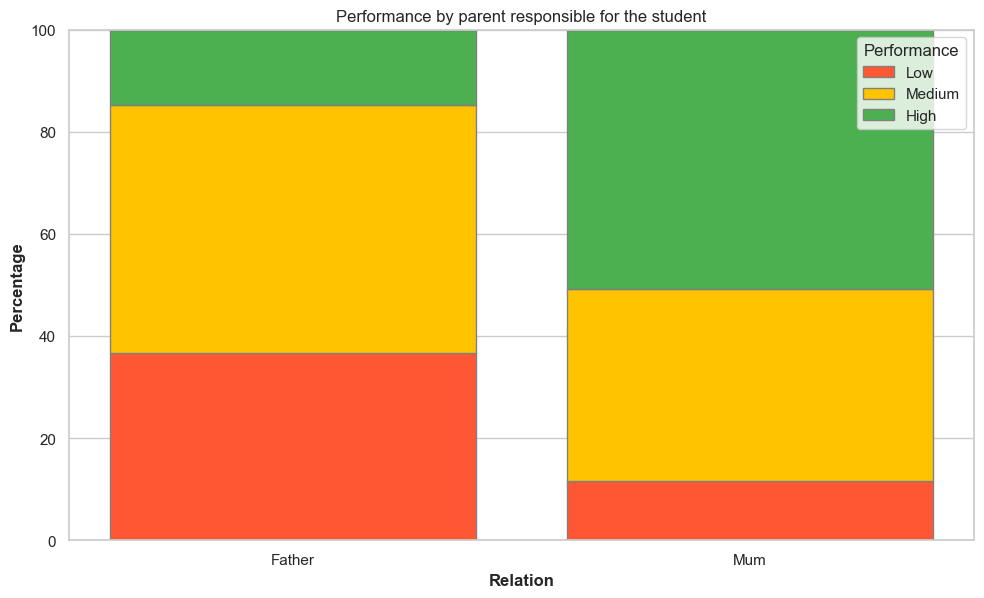

In [26]:
relation_performance_dictionary = {
    "Father": {
        "H": len(df[(df["Relation"] == "Father") & (df["Class"] == "H")]),
        "M": len(df[(df["Relation"] == "Father") & (df["Class"] == "M")]),
        "L": len(df[(df["Relation"] == "Father") & (df["Class"] == "L")]),
    },
    "Mum": {
        "H": len(df[(df["Relation"] == "Mum") & (df["Class"] == "H")]),
        "M": len(df[(df["Relation"] == "Mum") & (df["Class"] == "M")]),
        "L": len(df[(df["Relation"] == "Mum") & (df["Class"] == "L")]),
    }
}

for key in relation_performance_dictionary:
    total = sum(relation_performance_dictionary[key].values())
    for key_x in relation_performance_dictionary[key]:
        relation_performance_dictionary[key][key_x] /= total

categories = list(relation_performance_dictionary.keys())
H_values = [relation_performance_dictionary[category]['H'] for category in categories]
M_values = [relation_performance_dictionary[category]['M'] for category in categories]
L_values = [relation_performance_dictionary[category]['L'] for category in categories]

totals = [H + M + L for H, M, L in zip(H_values, M_values, L_values)]
sorted_data = sorted(zip(categories, H_values, M_values, L_values, totals), key=lambda x: x[4], reverse=True)

categories, H_values, M_values, L_values, _ = zip(*sorted_data)

H_percent = [H * 100 for H in H_values]
M_percent = [M * 100 for M in M_values]
L_percent = [L * 100 for L in L_values]

bar_width = 0.5
r1 = np.arange(len(categories))

plt.figure(figsize=(10, 6))

plt.bar(r1, L_percent, color=degree_color_palette[0], edgecolor='grey', label='Low')
plt.bar(r1, M_percent, bottom=L_percent, color=degree_color_palette[1], edgecolor='grey', label='Medium')
plt.bar(r1, H_percent, bottom=[i + j for i, j in zip(L_percent, M_percent)], color=degree_color_palette[2], edgecolor='grey', label='High')

plt.xlabel('Relation', fontweight='bold')
plt.ylabel('Percentage', fontweight='bold')
plt.xticks(r1, categories)
plt.ylim(0, 100)

plt.legend(title='Performance')
plt.tight_layout()
plt.title('Performance by parent responsible for the student')
plt.show()

## Interesting observations from the data

### Activity correlations

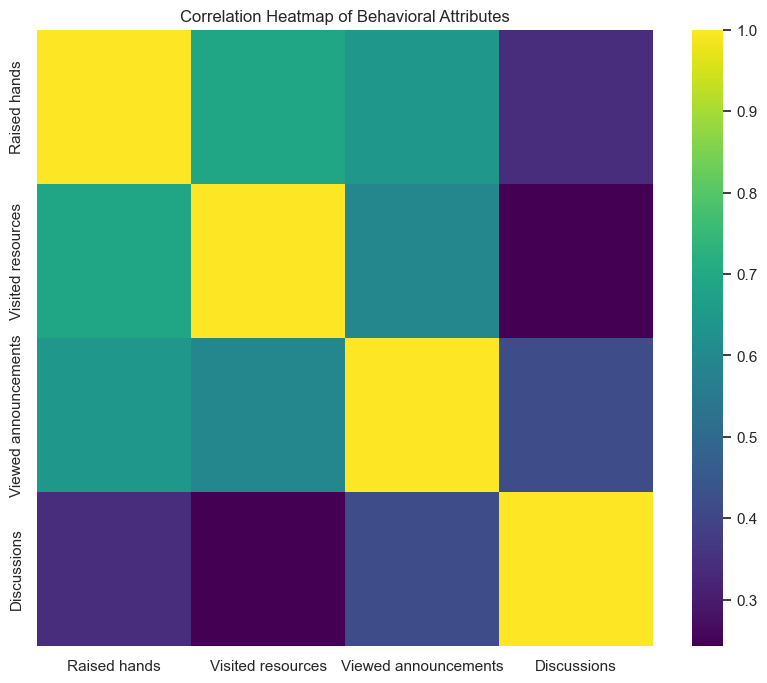

In [27]:
attributes = ["raisedhands", "VisITedResources", "AnnouncementsView", "Discussion"]
attribute_titles = ["Raised hands", "Visited resources", "Viewed announcements", "Discussions"]
corr_matrix = df[attributes].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="viridis", fmt=".2f", square=True, 
            xticklabels=attribute_titles, yticklabels=attribute_titles)
plt.title('Correlation Heatmap of Behavioral Attributes')
plt.show()

### Comparison of parenting

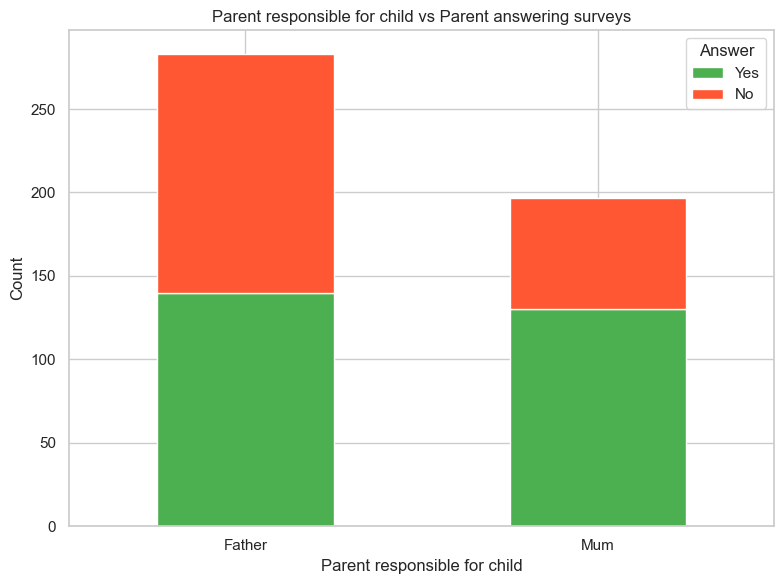

In [28]:
contingency_table = pd.crosstab(df['Relation'], df['ParentAnsweringSurvey'])
contingency_table[['Yes', 'No']].plot(kind='bar', stacked=True, figsize=(8, 6), color=[degree_color_palette[2], degree_color_palette[0]])

plt.xlabel('Parent responsible for child')
plt.ylabel('Count')
plt.title('Parent responsible for child vs Parent answering surveys')

plt.legend(title='Answer')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

As a conclusion we may say that mums (percent-wise) more often answer the surveys than dads.

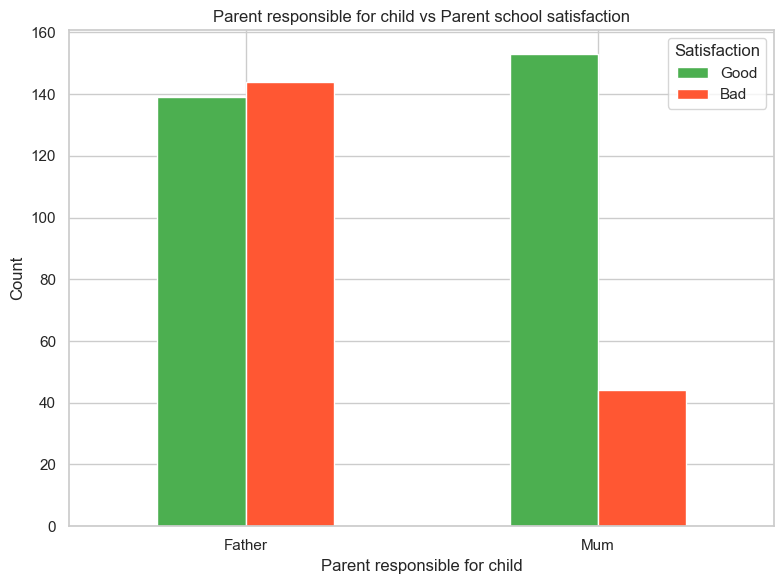

In [29]:
contingency_table = pd.crosstab(df['Relation'], df['ParentschoolSatisfaction'])
contingency_table = contingency_table[['Good', 'Bad']]
contingency_table.plot(kind='bar', figsize=(8, 6), color=[degree_color_palette[2], degree_color_palette[0]])

plt.xlabel('Parent responsible for child')
plt.ylabel('Count')
plt.title('Parent responsible for child vs Parent school satisfaction')

plt.legend(title='Satisfaction')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

From this graph it seems that either mums are loyal to the schools their children are studying at, or they choose better schools for their children at the first place.

### Comparisons with gender

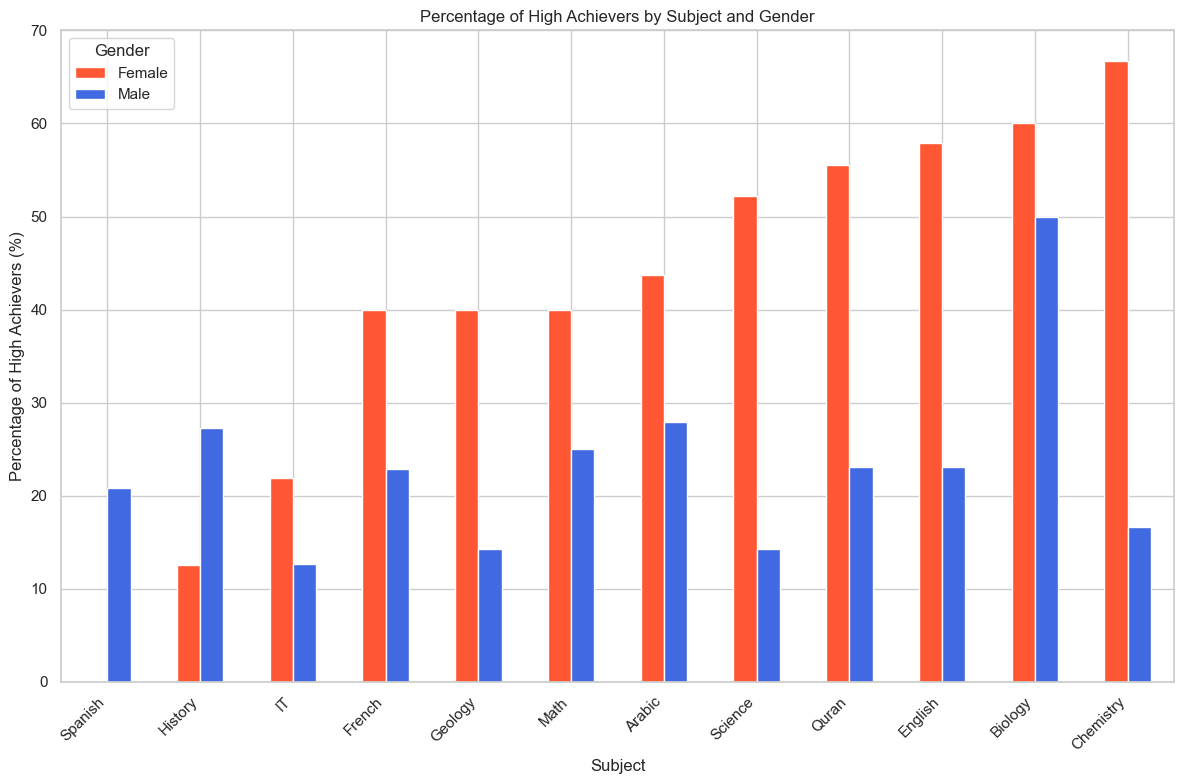

In [30]:
df_h = df[df['Class'] == 'H']
h_counts = df_h.groupby(['Topic', 'gender']).size().unstack(fill_value=0)
total_gender_counts = df.groupby(['Topic', 'gender']).size().unstack(fill_value=0)
h_percentages = (h_counts.div(total_gender_counts) * 100).round(2)
h_percentages_sorted = h_percentages.sort_values(by='F', ascending=True)

h_percentages_sorted.plot(kind='bar', figsize=(12, 8), color=gender_color_palette)
plt.xlabel('Subject')
plt.ylabel('Percentage of High Achievers (%)')
plt.title('Percentage of High Achievers by Subject and Gender')
plt.legend(title='Gender', labels=["Female", "Male"])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Female pupils have more high-achievers (percent-wise) for almost all subjects.

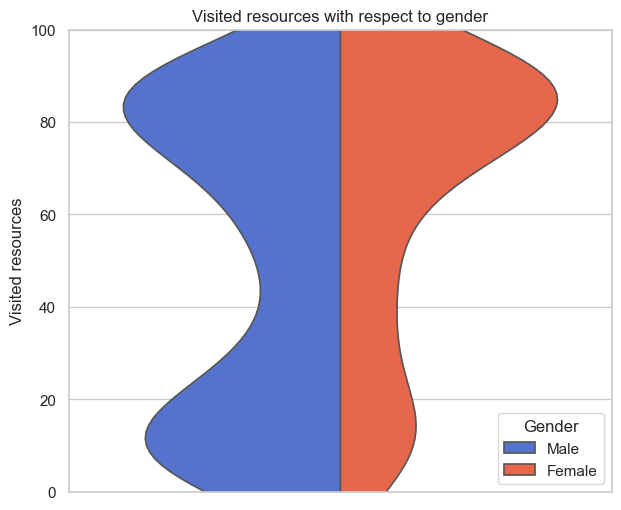

In [31]:
df_v = df.copy()
df_v['dummy'] = [1 for _ in range(df.shape[0])]
plt.figure(figsize=(7, 6))
sns.violinplot(df_v, x='dummy', y='VisITedResources', hue='gender', split=True, inner=None, palette=gender_color_palette[::-1], )

plt.ylim(0, 100)
plt.title('Visited resources with respect to gender')
plt.xticks([])
plt.xlabel("")
plt.ylabel("Visited resources")
plt.legend(title='Gender', labels=["Male", "Female"], loc="lower right")
plt.show()


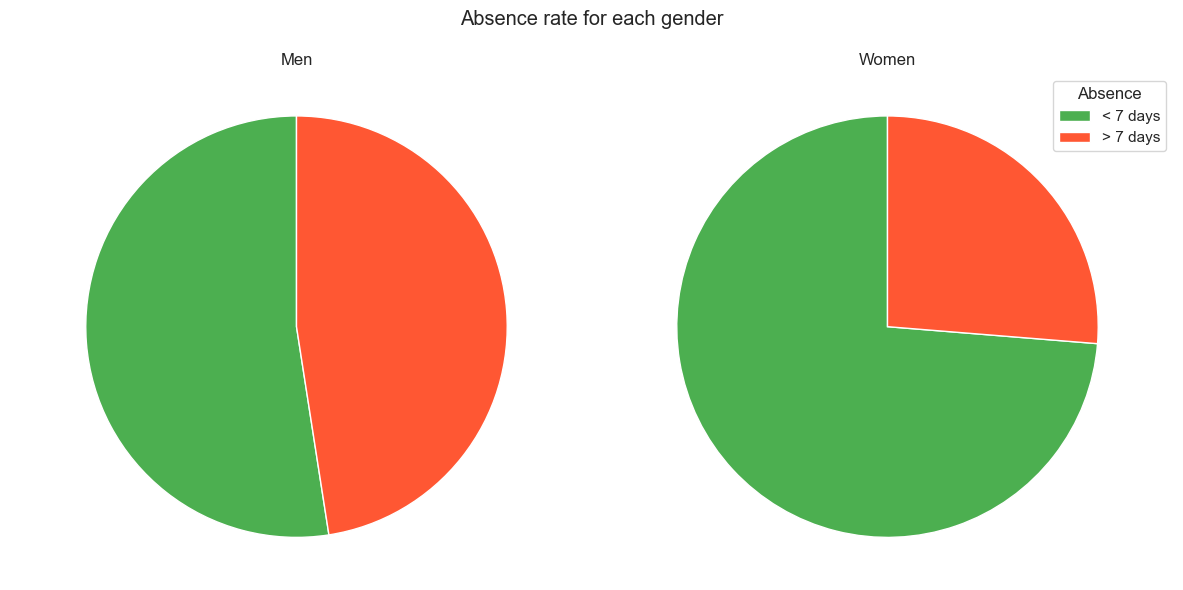

In [32]:
female = df[df['gender'] == 'F']
male = df[df['gender'] == 'M']

female_under7 = female[(female["StudentAbsenceDays"] == "Under-7")]
male_under7 = male[(male["StudentAbsenceDays"] == "Under-7")]

female_above7 = female[(female["StudentAbsenceDays"] == "Above-7")]
male_above7 = male[(male["StudentAbsenceDays"] == "Above-7")]

female_class = len(female_under7) / len(female), len(female_above7) / len(female)
male_class = len(male_under7) / len(male), len(male_above7) / len(male)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].pie(male_class, labels=None, startangle=90, colors=[degree_color_palette[2], degree_color_palette[0]])
axs[0].set_title('Men')

axs[1].pie(female_class, labels=None, startangle=90, colors=[degree_color_palette[2], degree_color_palette[0]])
axs[1].set_title('Women')

fig.suptitle('Absence rate for each gender')

for ax in axs:
    ax.axis('equal')

axs[1].legend(['< 7 days', '> 7 days'], loc="best", title='Absence')
plt.tight_layout()
plt.show()

### Absence rate depending on the educational stage

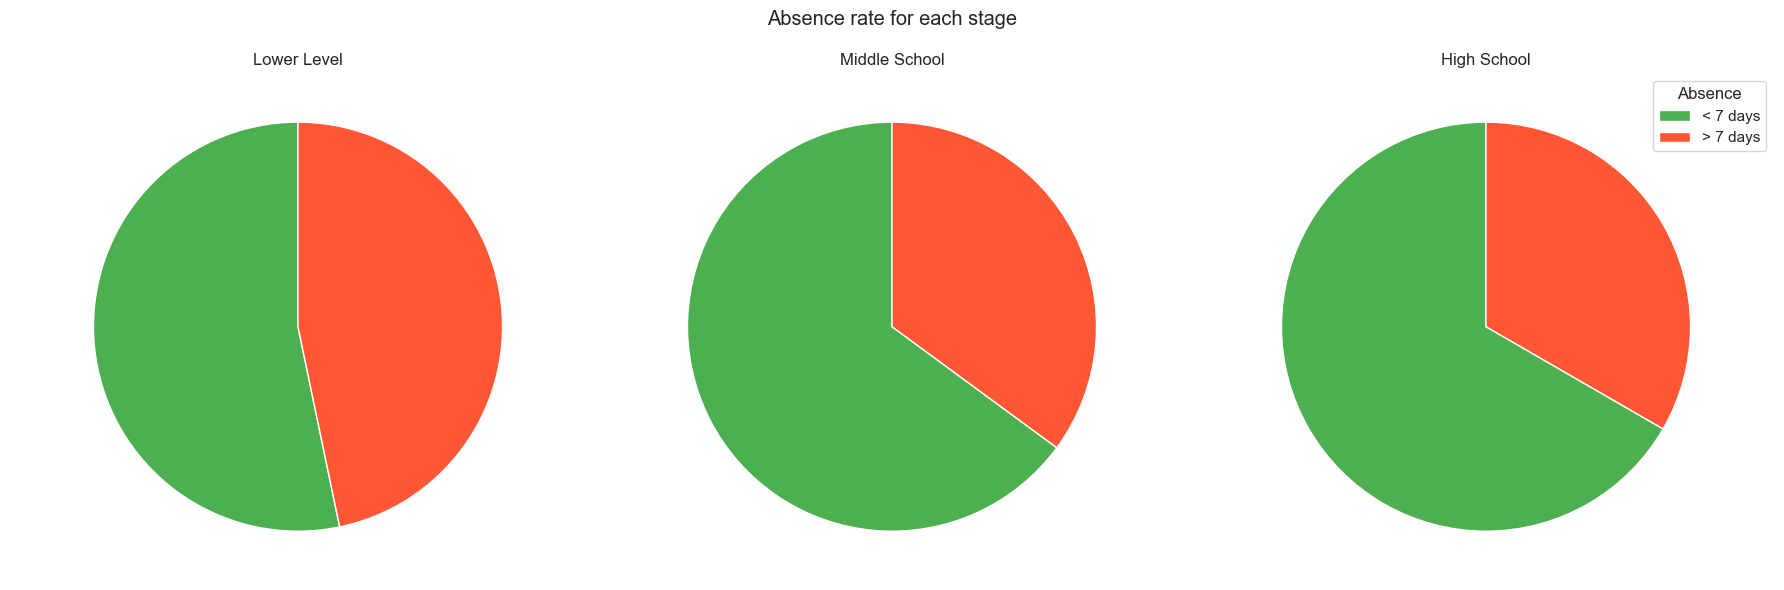

In [33]:
low = df[df['StageID'] == 'lowerlevel']
mid = df[df['StageID'] == 'MiddleSchool']
high = df[df['StageID'] == 'HighSchool']

low_under7 = low[(low["StudentAbsenceDays"] == "Under-7")]
mid_under7 = mid[(mid["StudentAbsenceDays"] == "Under-7")]
high_under7 = high[(high["StudentAbsenceDays"] == "Under-7")]

low_above7 = low[(low["StudentAbsenceDays"] == "Above-7")]
mid_above7 = mid[(mid["StudentAbsenceDays"] == "Above-7")]
high_above7 = high[(high["StudentAbsenceDays"] == "Above-7")]

low_class = len(low_under7) / len(low), len(low_above7) / len(low)
mid_class = len(mid_under7) / len(mid), len(mid_above7) / len(mid)
high_class = len(high_under7) / len(high), len(high_above7) / len(high)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].pie(low_class, labels=None, startangle=90, colors=[degree_color_palette[2], degree_color_palette[0]])
axs[0].set_title('Lower Level')

axs[1].pie(mid_class, labels=None, startangle=90, colors=[degree_color_palette[2], degree_color_palette[0]])
axs[1].set_title('Middle School')

axs[2].pie(high_class, labels=None, startangle=90, colors=[degree_color_palette[2], degree_color_palette[0]])
axs[2].set_title('High School')

fig.suptitle('Absence rate for each stage')

for ax in axs:
    ax.axis('equal')

axs[2].legend(['< 7 days', '> 7 days'], loc="best", title='Absence')
plt.tight_layout()
plt.show()